In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime,date

%matplotlib inline

In [2]:
df = pd.read_csv('CSV/patients.csv')

### check if there are empty/NaN values

In [3]:
# Method 1 
isempty = df.empty

# Method 2 
df.isna()

,subject_id,gender,dob
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
295,False,False,False
296,False,False,False
297,False,False,False
298,False,False,False


### count and print the occurencies of male and female patients

In [4]:
df['gender'].value_counts(dropna=False)

F    160
M    140
Name: gender, dtype: int64

### plot their occurencies using one of the specified plotting libraries

<AxesSubplot:xlabel='gender', ylabel='count'>

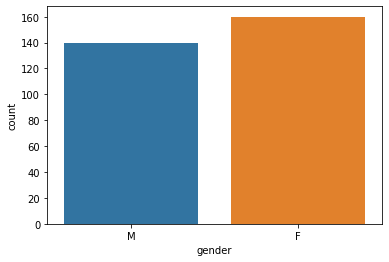

In [5]:
sns.countplot(x='gender',data=df)

In [6]:
### compute age from 'dob' column:

# a) use to_datetime() method to convert 'dob' to datetime format
df['Date'] = pd.to_datetime(df['dob'], errors='coerce')
df.head()

,subject_id,gender,dob,Date
0,0,M,1/1/2000,2000-01-01
1,1,F,1/10/1969,1969-01-10
2,2,F,8/6/1995,1995-08-06
3,3,M,6/1/1967,1967-06-01
4,4,M,6/2/1963,1963-06-02


In [7]:
df["age"] = (pd.to_datetime('now') - df["Date"]).astype('<m8[Y]')
df.head()

,subject_id,gender,dob,Date,age
0,0,M,1/1/2000,2000-01-01,21.0
1,1,F,1/10/1969,1969-01-10,52.0
2,2,F,8/6/1995,1995-08-06,25.0
3,3,M,6/1/1967,1967-06-01,53.0
4,4,M,6/2/1963,1963-06-02,57.0


In [8]:
def age(Date):
    age = (pd.to_datetime('now') - df["Date"]).astype('<m8[Y]')
    return age
age(df['Date'])

0      21.0
1      52.0
2      25.0
3      53.0
4      57.0
       ... 
295    52.0
296    57.0
297    21.0
298    53.0
299    21.0
Name: Date, Length: 300, dtype: float64

## Kates' Part

In [9]:
#read 'noteevents.xlsx' file into a DataFrame.
df2 = pd.read_csv('CSV/noteevents.csv')
df2.head()

,subject_id,chartdate,category,text
0,0,01/01/2086,Urology,"CHIEF COMPLAINT: , Blood in urine.,HISTORY OF ..."
1,0,01/01/2086,Emergency Room Reports,"CHIEF COMPLAINT: , Blood in urine.,HISTORY OF ..."
2,0,01/01/2086,General Medicine,"CHIEF COMPLAINT: , Blood in urine.,HISTORY OF ..."
3,0,01/01/2086,General Medicine,"CHIEF COMPLAINT:, Followup on hypertension an..."
4,0,01/01/2086,Consult - History and Phy.,"CHIEF COMPLAINT: , Blood in urine.,HISTORY OF ..."


In [10]:
#print the unique values of 'category' column
df2['category'].unique()

array([' Urology', ' Emergency Room Reports', ' General Medicine',
       ' Consult - History and Phy.', ' Rheumatology', ' Dermatology',
       ' Radiology', ' Obstetrics / Gynecology', ' Discharge Summary',
       ' Cardiovascular / Pulmonary', ' Letters', ' Gastroenterology',
       ' Orthopedic', ' SOAP / Chart / Progress Notes', ' Office Notes',
       ' Psychiatry / Psychology', ' Neurology', ' Hematology - Oncology',
       ' Surgery', ' Physical Medicine - Rehab', ' Nephrology',
       ' Sleep Medicine', ' Speech - Language', ' IME-QME-Work Comp etc.',
       ' Diets and Nutritions', ' Allergy / Immunology', ' Bariatrics',
       ' Dentistry', ' Endocrinology', ' Autopsy',
       ' ENT - Otolaryngology', ' Neurosurgery', ' Chiropractic',
       ' Podiatry', ' Ophthalmology', ' Cosmetic / Plastic Surgery'],
      dtype=object)

In [11]:
#merge noteevents and patient dataframe based on the patient_id
merge_data = pd.merge(df,df2,on='subject_id')
merge_data

,subject_id,gender,dob,Date,age,chartdate,category,text
0,0,M,1/1/2000,2000-01-01,21.0,01/01/2086,Urology,"CHIEF COMPLAINT: , Blood in urine.,HISTORY OF ..."
1,0,M,1/1/2000,2000-01-01,21.0,01/01/2086,Emergency Room Reports,"CHIEF COMPLAINT: , Blood in urine.,HISTORY OF ..."
2,0,M,1/1/2000,2000-01-01,21.0,01/01/2086,General Medicine,"CHIEF COMPLAINT: , Blood in urine.,HISTORY OF ..."
3,0,M,1/1/2000,2000-01-01,21.0,01/01/2086,General Medicine,"CHIEF COMPLAINT:, Followup on hypertension an..."
4,0,M,1/1/2000,2000-01-01,21.0,01/01/2086,Consult - History and Phy.,"CHIEF COMPLAINT: , Blood in urine.,HISTORY OF ..."
...,...,...,...,...,...,...,...,...
2125,297,F,1/1/2000,2000-01-01,21.0,01/01/2059,Cardiovascular / Pulmonary,"INDICATIONS FOR PROCEDURE:, A 51-year-old, obe..."
2126,298,F,6/1/1967,1967-06-01,53.0,01/01/2075,Obstetrics / Gynecology,"HISTORY OF PRESENT ILLNESS:, The patient is a..."
2127,298,F,6/1/1967,1967-06-01,53.0,01/01/2075,SOAP / Chart / Progress Notes,"HISTORY OF PRESENT ILLNESS:, The patient is a..."
2128,298,F,6/1/1967,1967-06-01,53.0,01/01/2075,Obstetrics / Gynecology,"HISTORY OF PRESENT ILLNESS:, The patient is a..."


In [12]:
#groupby() to show the mean age per gender
grouped_gender = merge_data.groupby('gender')
gender_id = grouped_gender.age.mean()
gender_id

gender
F    37.216007
M    37.477273
Name: age, dtype: float64

In [13]:
#filter the dataframe to return information only for patients whose age is more than 50 years old. 
age_filter = merge_data[merge_data['age']>50]
age_filter

,subject_id,gender,dob,Date,age,chartdate,category,text
6,1,F,1/10/1969,1969-01-10,52.0,01/01/2079,General Medicine,"HISTORY OF PRESENT ILLNESS:, The patient is a ..."
7,1,F,1/10/1969,1969-01-10,52.0,01/01/2079,Rheumatology,"HISTORY OF PRESENT ILLNESS: , A 71-year-old fe..."
8,1,F,1/10/1969,1969-01-10,52.0,01/01/2079,Consult - History and Phy.,"HISTORY OF PRESENT ILLNESS:, The patient is a ..."
17,3,M,6/1/1967,1967-06-01,53.0,01/01/2075,Discharge Summary,"HISTORY OF PRESENT ILLNESS: ,A 67-year-old ma..."
18,3,M,6/1/1967,1967-06-01,53.0,01/01/2075,Cardiovascular / Pulmonary,"Dear Sample Doctor:,Thank you for referring Mr..."
...,...,...,...,...,...,...,...,...
2121,296,F,6/2/1963,1963-06-02,57.0,01/01/2090,Consult - History and Phy.,"PROBLEM:, Probable Coumadin hypersensitivity...."
2126,298,F,6/1/1967,1967-06-01,53.0,01/01/2075,Obstetrics / Gynecology,"HISTORY OF PRESENT ILLNESS:, The patient is a..."
2127,298,F,6/1/1967,1967-06-01,53.0,01/01/2075,SOAP / Chart / Progress Notes,"HISTORY OF PRESENT ILLNESS:, The patient is a..."
2128,298,F,6/1/1967,1967-06-01,53.0,01/01/2075,Obstetrics / Gynecology,"HISTORY OF PRESENT ILLNESS:, The patient is a..."


In [14]:
#plot which category has the highest amount of requests and this corresponding amount per gender
cat = grouped_gender['category'].value_counts(dropna=False)
cat

gender  category                      
F        Consult - History and Phy.       287
         General Medicine                 118
         SOAP / Chart / Progress Notes     90
         Neurology                         71
         Gastroenterology                  65
                                         ... 
M        Allergy / Immunology               7
         Discharge Summary                  6
         Podiatry                           5
         Dentistry                          3
         Speech - Language                  2
Name: category, Length: 64, dtype: int64

<AxesSubplot:xlabel='category', ylabel='Count'>

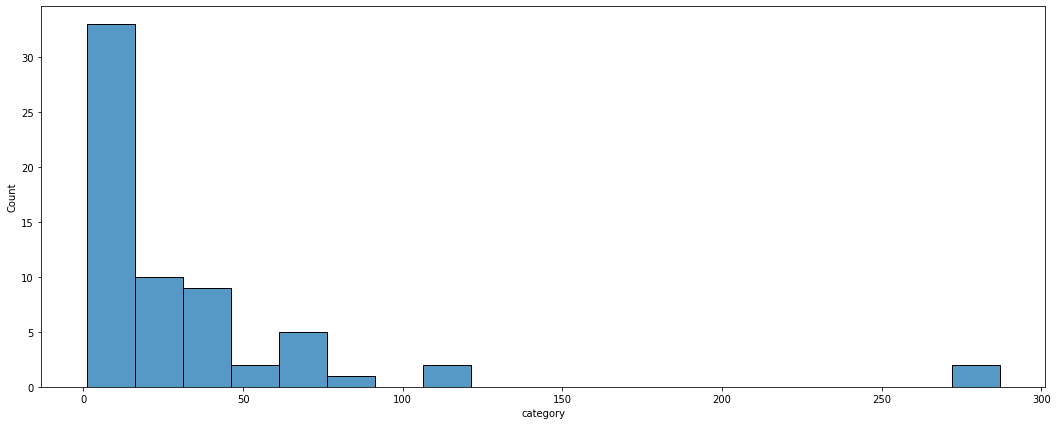

In [15]:
plt.figure(figsize=(18,7))
sns.histplot(cat)

In [100]:
# plt.figure(figsize=(18,7))
# merge_data.groupby('category').size().plot(kind='bar')

In [16]:
cat

gender  category                      
F        Consult - History and Phy.       287
         General Medicine                 118
         SOAP / Chart / Progress Notes     90
         Neurology                         71
         Gastroenterology                  65
                                         ... 
M        Allergy / Immunology               7
         Discharge Summary                  6
         Podiatry                           5
         Dentistry                          3
         Speech - Language                  2
Name: category, Length: 64, dtype: int64

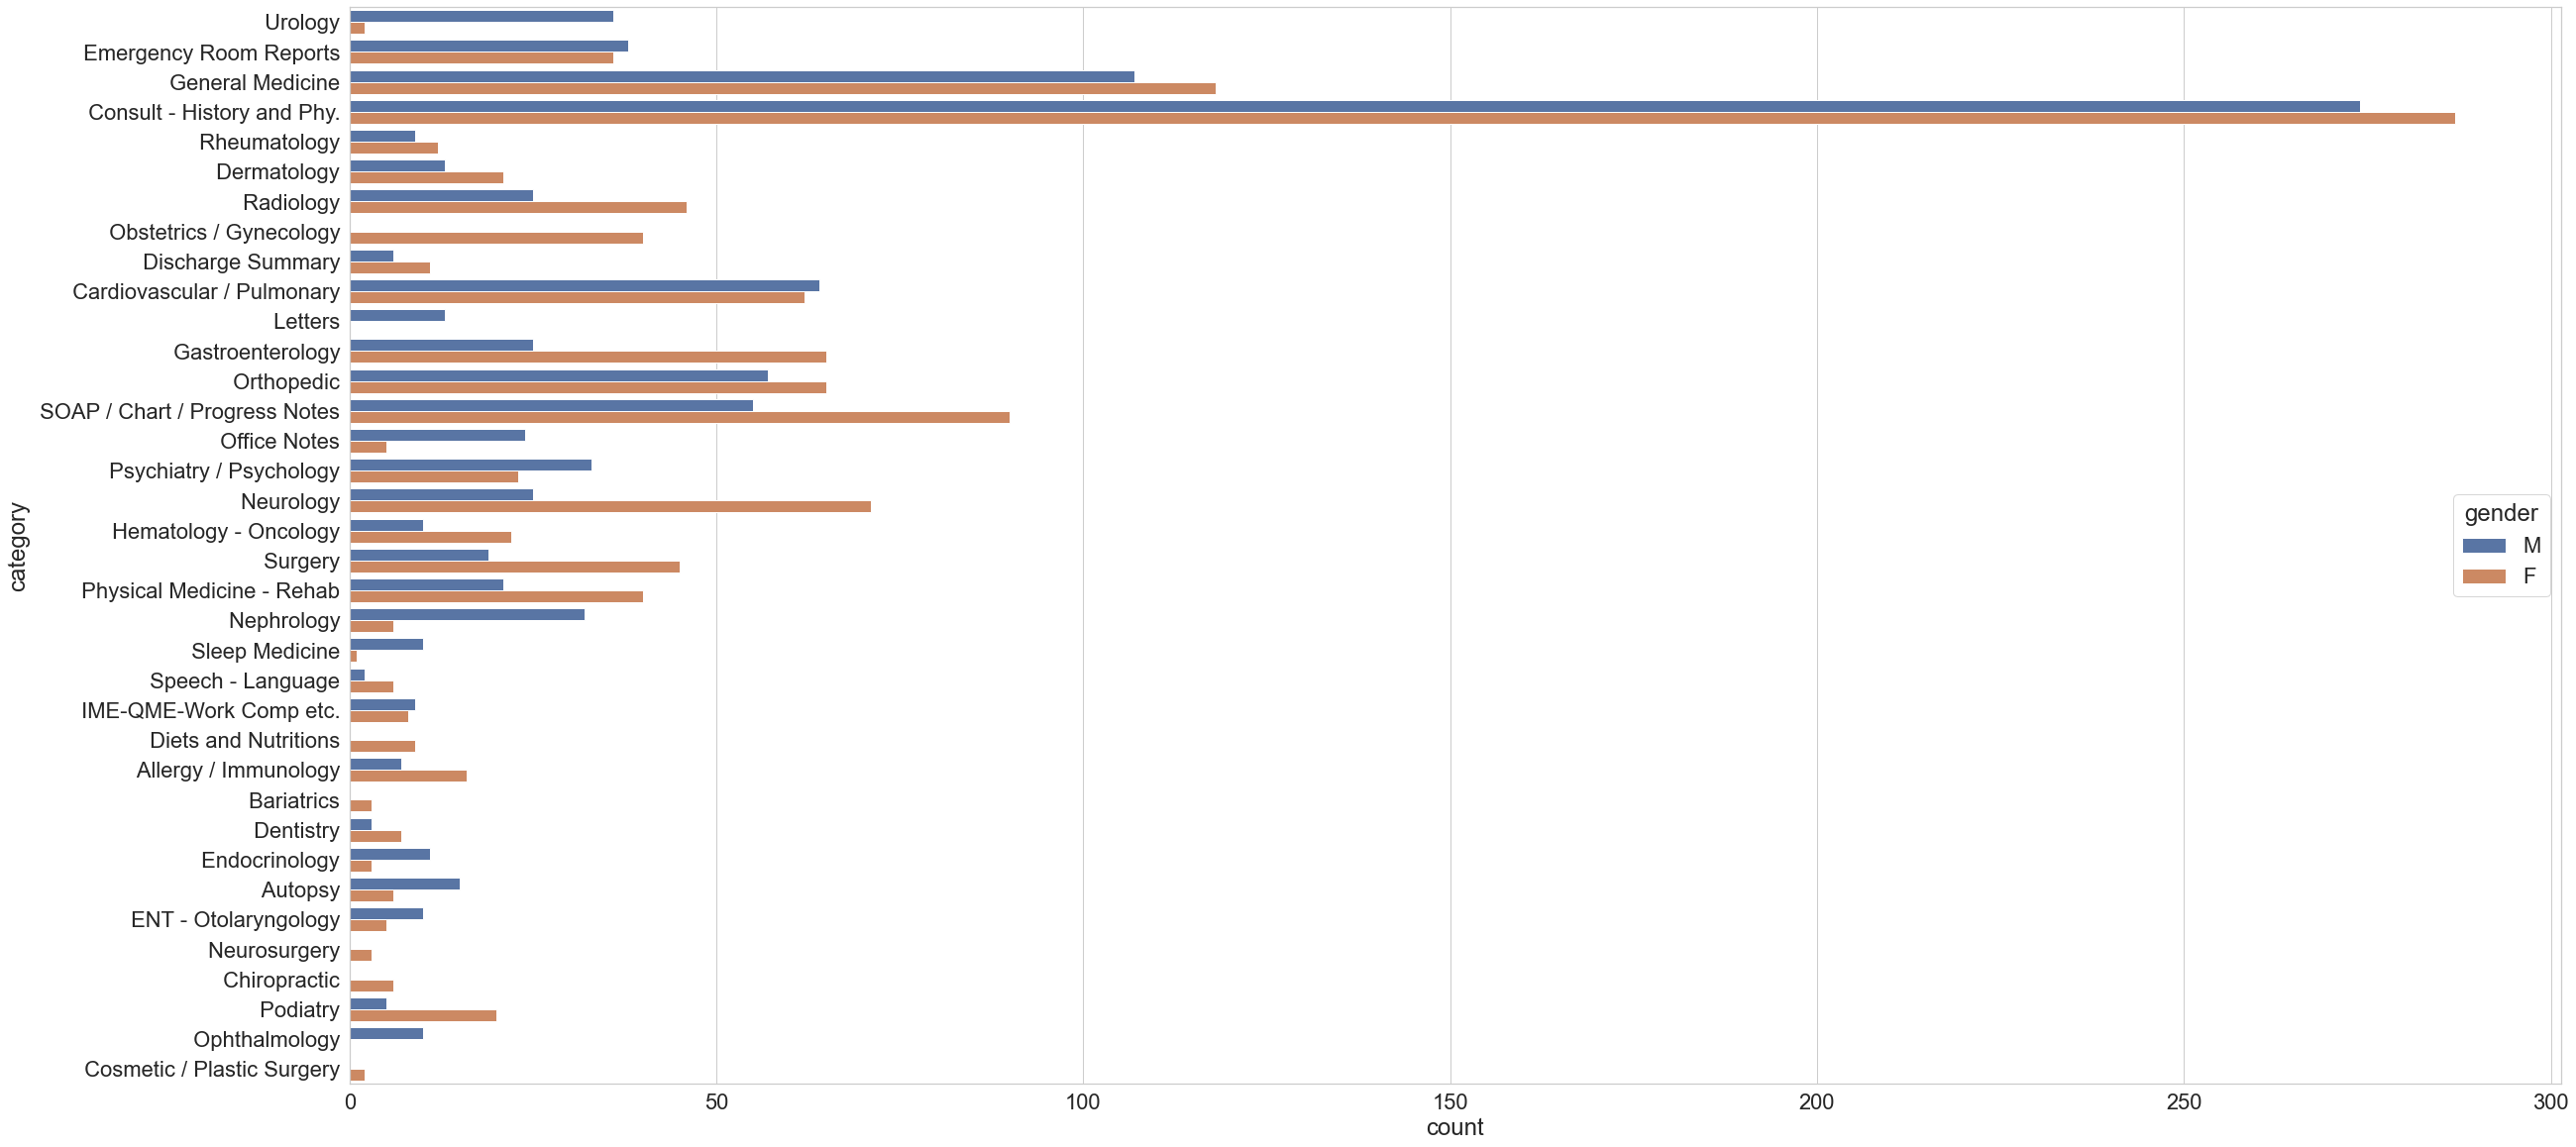

In [69]:
plt.figure(figsize=(40,20))
sns.set_style('whitegrid')
sns.countplot(y='category',data=merge_data,hue='gender')
sns.set(font_scale=3)